In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [35]:
df = pd.read_csv('C:\\Users\\Om Computers\\Downloads\\cap_stone_all_seen\\Capstone_project\\4seenshot\\basic_clean.csv')

In [36]:
df['Model'].fillna('OTHER_MODEL', inplace = True)


In [37]:
df.isnull().sum()/len(df)*100

Unnamed: 0             0.000000
Cust Type              0.000000
Customer No.           0.000000
Gate Pass Time         0.000000
Invoice No             0.000000
Job Card No            0.000000
KMs Reading            0.000000
Labour Total           0.000000
Make                   0.000000
Misc Total             0.000000
Model                  0.000000
OSL Total              0.000000
Order Type             0.000000
Parts Total            0.000000
Pin code               0.000000
Plant                  0.000000
Plant Name1            0.000000
Print Status           0.000000
Recovrbl Exp           0.000000
Total Amt Wtd Tax.     0.000000
User ID                0.000000
Invoice_DateTime       0.000000
JobCard_DateTime       0.000000
Service_Time           0.000000
Clean_CITY            10.057088
Clean_District        10.057088
Clean_Location_Area   10.057088
Business Partner      95.564765
Partner Type          95.564765
Data Origin           95.564765
DBM Order              0.004165
Item Cat

In [38]:
df.drop(['Business Partner','Partner Type','Data Origin'], axis = 1, inplace = True)

In [39]:
'Clean_CITY','Clean_District','Clean_Location_Area'

('Clean_CITY', 'Clean_District', 'Clean_Location_Area')

In [40]:
df_r=df
df_r.drop(['Clean_CITY','Clean_District','Clean_Location_Area'], axis = 1, inplace = True)

In [41]:
df_r.dropna(inplace=True)

In [42]:
df_r.isnull().sum()/len(df)*100

Unnamed: 0           0.000000
Cust Type            0.000000
Customer No.         0.000000
Gate Pass Time       0.000000
Invoice No           0.000000
Job Card No          0.000000
KMs Reading          0.000000
Labour Total         0.000000
Make                 0.000000
Misc Total           0.000000
Model                0.000000
OSL Total            0.000000
Order Type           0.000000
Parts Total          0.000000
Pin code             0.000000
Plant                0.000000
Plant Name1          0.000000
Print Status         0.000000
Recovrbl Exp         0.000000
Total Amt Wtd Tax.   0.000000
User ID              0.000000
Invoice_DateTime     0.000000
JobCard_DateTime     0.000000
Service_Time         0.000000
DBM Order            0.000000
Item Category        0.000000
Net value            0.000000
Order Quantity       0.000000
dtype: float64

In [44]:
df_r.drop('Unnamed: 0', axis = 1, inplace = True)

In [45]:
df_r.head()

,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,DBM Order,Item Category,Net value,Order Quantity
0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P001,1203.140000,73.000000
1,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P002,2348.750000,6.500000
2,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P010,500.060000,1.000000
3,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,173997.000000,P001,804.260000,170.000000
4,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,173997.000000,P011,197.030000,1.000000


In [46]:
len(df_r)

936236

In [51]:
import matplotlib.pyplot as plt

In [108]:

from sklearn.cluster import KMeans
def Knumber(df):
      dist=[]
      # Iterate from 1-9
      for i in range(1,10):
            # Initialize KMeans algorithm
            km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
            # Fit on data
            km.fit(df)
            # Append WCSS to list storing WCSS
            dist.append(km.inertia_)
      # Initialize figure
      fig=plt.figure( figsize=[10,8])
      # Line plot # clusters on X-axis and WCSS on Y-axis 
      plt.plot(range(1,10),dist)
      plt.show()

# cluster 1 'KMs Reading','Total Amt Wtd Tax.'

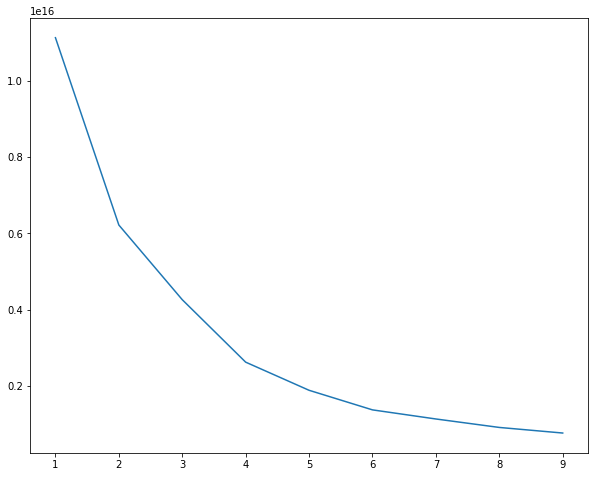

In [67]:
dfk=df_r[['KMs Reading','Total Amt Wtd Tax.']]
Knumber(dfk)

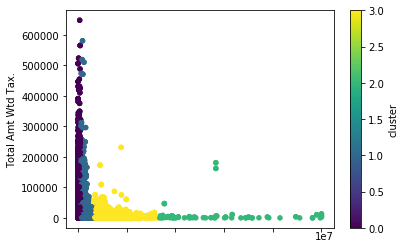

In [78]:
cluster=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
# create 'cluster' column
df_r['c_TA_KM']=cluster.fit_predict(dfk)
df_r.plot.scatter('KMs Reading','Total Amt Wtd Tax.', c='c_TA_KM', cmap='viridis')

In [77]:
df_r['c_TA_KM'].value_counts()

0    758059
1    174179
3      3903
2        95
Name: cluster, dtype: int64

In [80]:
df_r.head()

,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Total Amt Wtd Tax.,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,DBM Order,Item Category,Net value,Order Quantity,year,month,c_TA_KM
0,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P001,1203.140000,73.000000,2015,1,0
1,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P002,2348.750000,6.500000,2015,1,0
2,Retail,67849,00:00:00,7005200002,168303,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,168303.000000,P010,500.060000,1.000000,2015,1,0
3,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,173997.000000,P001,804.260000,170.000000,2015,1,0
4,Retail,84419,00:00:00,7005200003,173997,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,173997.000000,P011,197.030000,1.000000,2015,1,0


In [103]:
df_r['Service_days']=df_r['Service_Time'].apply(lambda x: x.split()[0].strip())

In [104]:
df_r['Service_days']=df_r['Service_days'].astype(int)

In [ ]:
df_r.dtypes

# cluster 2 'Service_days','Total Amt Wtd Tax.'

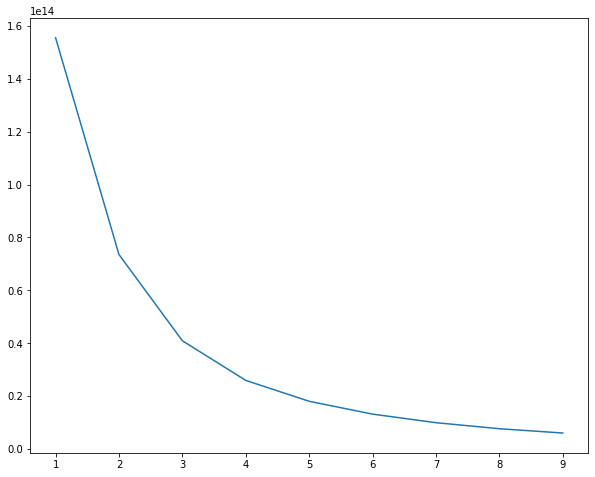

In [109]:
dfk2=df_r[['Service_days','Total Amt Wtd Tax.']]
Knumber(dfk2)

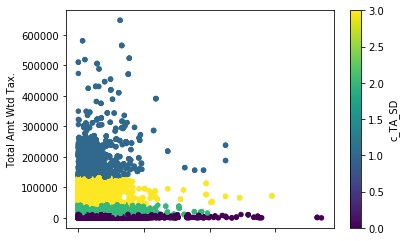

In [111]:
cluster=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
# create 'cluster' column
df_r['c_TA_SD']=cluster.fit_predict(dfk2)
df_r.plot.scatter('Service_days','Total Amt Wtd Tax.', c='c_TA_SD', cmap='viridis')

In [112]:
df_r['c_TA_SD'].value_counts()

0    823404
2     99321
3     11990
1      1521
Name: c_TA_SD, dtype: int64

In [ ]:
# Lifetime customer Value

## customer expenditures per visit

s = (sum(df_r.groupby(['Customer No.'])["Total Amt Wtd Tax."].sum()))/936236

### number of visits per month (the “purchase cycle”)

from dateutil.relativedelta import relativedelta

from datetime import *
df_r['Invoice_DateTime']=pd.to_datetime(df_r['Invoice_DateTime'])
df_r['year']=df_r['Invoice_DateTime'].dt.year
df_r['month']=df_r['Invoice_DateTime'].dt.month

c = (df_r.groupby(['Customer No.'])["month"].count()).mode()

t = ((df_r.groupby(['Customer No.'])["Invoice_DateTime"].max() - df_r.groupby(['Customer No.'])["Invoice_DateTime"].min())/np.timedelta64(1,'M')).mean()

a = s * c

SLTV = (12 * a) * t

CLTV = t*12*s*c
CLTV

In [113]:
df_r.to_csv('df_r.csv')